In [34]:
import pandas as pd
import os

from scipy import signal

import matplotlib.pyplot as plt

import numpy as np

from pydantic import BaseModel, Field
from typing import List

In [ ]:
class CarpetRegion(BaseModel):
    start_hz: float = Field(..., description="Start frequency in Hz")
    end_hz: float = Field(..., description="End frequency in Hz")
class Wave(BaseModel):
    time: List[float] = Field(..., description="Time points of the wave")
    signal: List[float] = Field(..., description="Signal values")


class Model:
    def __init__(self, **params):
        # Store hyperparameters if needed
        self.params = params
    def predict(self, wave: Wave) -> List[CarpetRegion]:
        """
        Predict carpet regions from a given wave.
        This should be implemented with actual logic.
        """
        # Example placeholder
        raise NotImplementedError("Predict method not implemented.")


# def moving_average(x, w):
#     return np.convolve(x, np.ones(w), 'valid') / w

In [86]:
path = "./part_2/"
files = os.listdir(path)

data = pd.read_csv(path+files[1])

#data["data"].plot()


<Axes: >

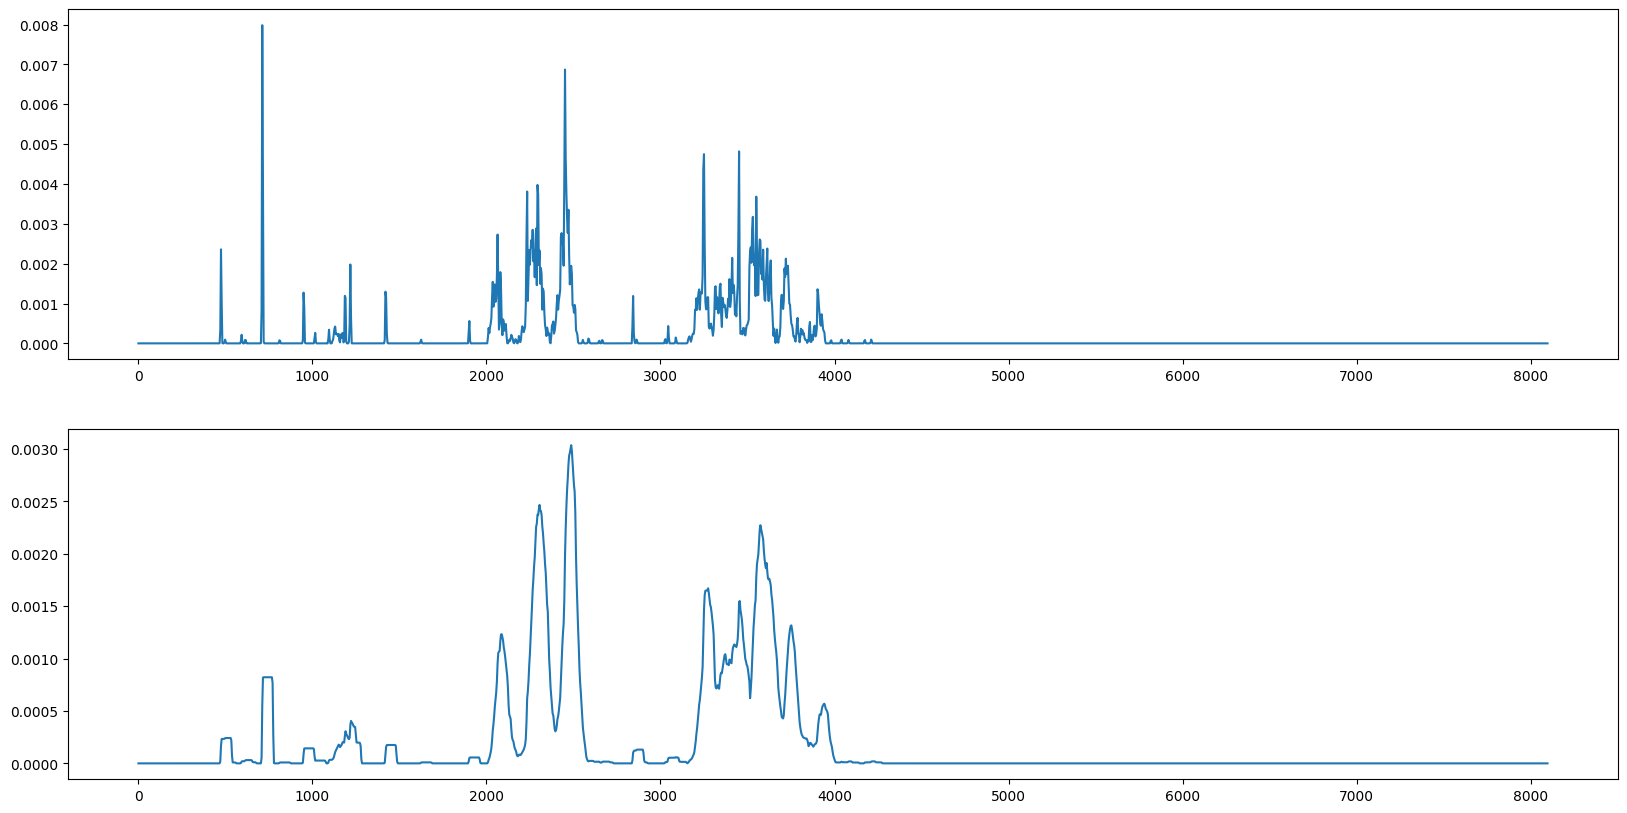

In [87]:
fs = data.shape[0] / data["t"].max()          # taxa de amostragem
f, Pxx = signal.welch(data["data"].to_numpy(), fs=fs, window='hann', nperseg=4096, noverlap=2048, scaling='density')

fig,axs = plt.subplots(2,1,figsize=(20,10))

axs[0].plot(f,Pxx)
smoothedW = (pd.Series(Pxx,index=f).rolling(16, min_periods=1).sum()/16)
smoothedW.plot(ax=axs[1])

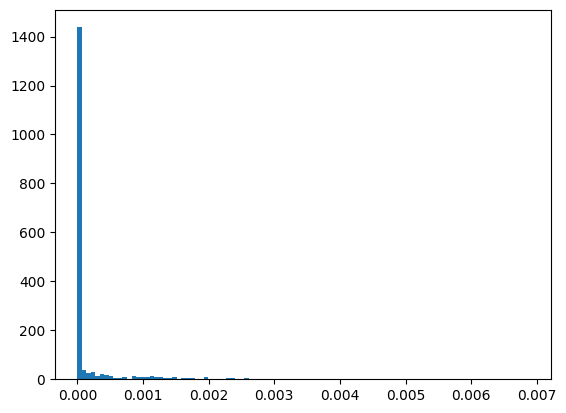

In [93]:
count = plt.hist(Pxx[f>1000], bins=100)

In [46]:
smoothedW

0       -0.183216
1       -0.375986
2       -0.705095
3       -1.028860
4       -1.345958
          ...    
2044   -21.967253
2045   -21.967659
2046   -21.968043
2047   -21.968407
2048   -21.978156
Length: 2049, dtype: float64